In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

#import seaborn as sns

In [29]:
import numpy as np
import h5py
from corner import corner
#from getdist import plots, MCSamples
#import getdist
from chainconsumer import ChainConsumer
from glob import glob

In [30]:
#test_path = '/home/users/swmclau2/scratch/uatu_preds/deep_resnet_smooth_1.0_noise_0.3_10.hdf5'
test_files = sorted(glob('../preds/*mcmc.hdf5'))

In [31]:
print test_files

['../preds/uatu_pc_emu_mcmc.hdf5']


In [32]:
#test_names = ['Adv. Resnet', 'Shuffled Resnet', 'Resnet', 'Gupta']
#test_names = ['Adv. Resnet', 'Resnet', 'Gupta']
test_names = ['MCMC' for i in xrange(1)]

In [45]:
def get_outputs(test_path):

    with h5py.File(test_path, 'r') as f:
        output = f['chain'][500*500:, :]
    return output, None

In [46]:
plot_idx = 0
outputs, truths = get_outputs(test_files[plot_idx])

In [47]:
names = ['Om', 's8']

In [48]:
c = ChainConsumer()

for name, tf in zip(test_names, test_files):#[1:-1]:
    outputs, _ = get_outputs(tf)
    outputs = outputs#[100*1000:]
    print outputs.shape
    c.add_chain(outputs, parameters=names, name = name)

(750000, 2)


In [49]:
c.configure(kde=[False for _ in xrange(len(test_files))])#, shade_alpha=0.1, flip=False)

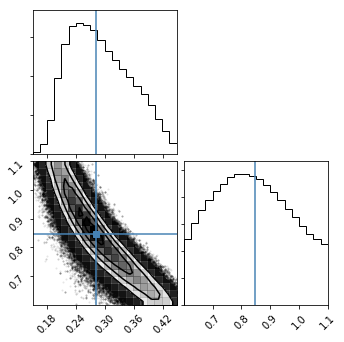

In [50]:
corner(outputs, truths=[0.279925, 0.846988]);

In [42]:
np.any(outputs[closest_to_center_idx]== np.inf)

NameError: name 'closest_to_center_idx' is not defined

In [ ]:
plt.hist(outputs[closest_to_center_idx][0,:], bins = 100);
plt.vlines(truths[closest_to_center_idx][0], 0, 50)
plt.show();
plt.hist(outputs[closest_to_center_idx][1,:], bins = 100);
plt.vlines(truths[closest_to_center_idx][1], 0, 50)

plt.show()

In [ ]:
c.plotter.plot(chains=['Shuffled Resnet'], truth=truths[closest_to_center_idx].T);